**Project Description:** Twitter US Airline Sentiment
Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").


**Dataset:**
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
 tweet_id
 airline_sentiment
 airline_sentiment_confidence
 negativereason
 negativereason_confidence
 airline
 airline_sentiment_gold
 name
 negativereason_gold
 retweet_count
 text
 tweet_coord
 tweet_created
 tweet_location
 user_timezone

**Objective:**
To implement the techniques learnt as a part of the course.
Learning Outcomes:
 Basic understanding of text pre-processing.
 What to do after text pre-processing:
o Bag of words
o Tf-idf
 Build the classification model.
 Evaluate the Model.

**Steps and tasks:**
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.
3. Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset. (8 Marks)


**Import the libraries, load dataset, print shape of data, data description.**

In [1]:
!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tweets.csv")
pd.set_option('display.max_colwidth', None)


In [5]:
data.shape   

(14640, 15)

In [6]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
#The number of tweets per airline
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [9]:
#The percentage of tweets that each airline accounts in this dataset
(data[['airline', 'text']].groupby('airline').count()/len(data))

,text
airline,
American,0.188456
Delta,0.151776
Southwest,0.165301
US Airways,0.198975
United,0.261066
Virgin America,0.034426


Text(0, 0.5, 'Number of tweets')

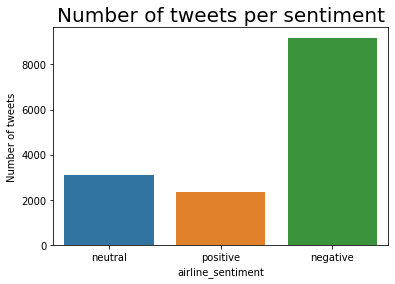

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='airline_sentiment', data=data, )
plt.title('Number of tweets per sentiment', fontsize=20)
plt.xlabel('airline_sentiment')
plt.ylabel('Number of tweets')

In [11]:
#How customers feel about each airline
pd.crosstab(data.airline, data.airline_sentiment)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


**a. Drop all other columns except “text” and “airline_sentiment”
 b. Check the shape of data. 
 c. Print first 5 rows of data.**

In [12]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [13]:
#df_d=pd.DataFrame(data,columns=['text','airline_sentiment','tweet_id'])
#df = pd.DataFrame.drop_duplicates(df_d)
#print(df)

In [14]:
# Only keeping “text” and “airline_sentiment” columns from the data, as these are useful for our analysis.

data = data.loc[:,['text', 'airline_sentiment']]

In [15]:
data.isnull().sum(axis=0)  

text                 0
airline_sentiment    0
dtype: int64

**Insights:**
There is no null entry for text and airline sentiment.

In [16]:
data.shape

(14640, 2)

In [17]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


**Text pre-processing: Data preparation:** 
1. Remove Html tag, URL ta gs,special charcters,punctuations, stop words and numbers.
2. Replace contractions in string of text.
3. Perform tokenization of data.
4. Convert to lower case.
5. Lemmetize or stemming the word.
6. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)




**Html tag removal.**

In [18]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


**Removal of URL:**

In [19]:
def remove_URL(text):
  text = re.sub(r'http\S+', '', text)
  return text
  
data['text'] = data['text'].apply(lambda x: remove_URL(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [20]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


**Remove the numbers.**

In [21]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text
  
data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


**Removal of Special Characters:**

In [22]:
#remove special characters
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

data['text'] = data['text'].apply(lambda x: remove_special_characters(x))
data.head()


,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus you have added commercials to the experience tacky,positive
2,VirginAmerica I did not today Must mean I need to take another trip,neutral
3,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse,negative
4,VirginAmerica and it is a really big bad thing about it,negative


**Tokenization**

In [23]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
data.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]",positive
2,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]",neutral
3,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]",negative
4,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


**Removal of Punctuations:**

In [24]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
#data['text'] = data['text'].apply(lambda x: remove_punctuation(x))
#data.head()

**Removal of stopwords:**

In [25]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [26]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

#data['text'] = data['text'].apply(lambda x: remove_stopwords(x))
#data.head()

**Conversion to lowercase**

In [27]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#data['text'] = data['text'].apply(lambda x: to_lowercase(x))
#data.head()


**Lemmatize or stemming:**

In [28]:
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words
    #return ' '.join(words)

#data['text'] = data['text'].apply(lambda x: lemmatize_list(x))
#data.head()


**Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)**

In [29]:
def normalize(words):
  
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = to_lowercase(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica i not today must mean i need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


 

**Print first 5 rows of data after pre-processing.** 

In [30]:
data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica i not today must mean i need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


**Vectorization: a. Use CountVectorizer**

In [31]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000,min_df=10, max_df=0.8)                # Keep only 2000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()  
data_features.shape

(14640, 1000)

In [32]:
from sklearn.preprocessing import LabelEncoder
#creating instance of labelencoder
labelencoder = LabelEncoder()
data['airline_sentiment'] = labelencoder.fit_transform(data['airline_sentiment'])
labels= data['airline_sentiment']


In [33]:
data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,1
1,virginamerica plus add commercials experience tacky,2
2,virginamerica i not today must mean i need take another trip,1
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,0
4,virginamerica really big bad thing,0


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

**Fit and evaluate model using CountVectorizer**

In [35]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model_CV = RandomForestClassifier(n_estimators=10, n_jobs=4)

model_CV = model_CV.fit(X_train, Y_train)

print(model_CV)

print(np.mean(cross_val_score(model_CV, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7155737704918033


In [36]:
# Predict the result for test data using the model built above.
Y_predict = model_CV.predict(X_test)

[[2491  240   83]
 [ 357  434   93]
 [ 164  121  409]]


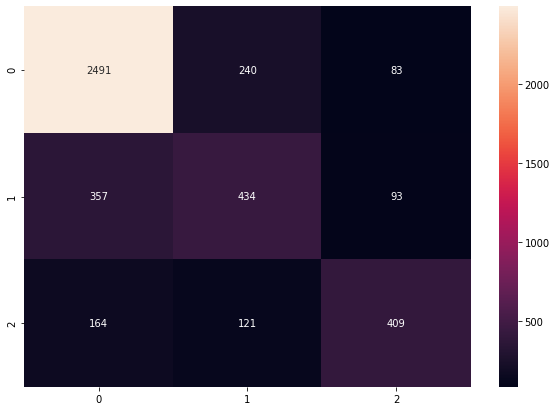

In [37]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y_test, Y_predict)

print(CM)

df_CM = pd.DataFrame(CM, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_CM, annot=True, fmt='g')
plt.show()

**b. Use TfidfVectorizer**

In [38]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000,min_df=10, max_df=0.8)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

**Fit and evaluate model using TfidfVectorizer**

In [39]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model_TIV = RandomForestClassifier(n_estimators=10, n_jobs=4)

model_TIV = model_TIV.fit(X_train, Y_train)

print(model_TIV)

print(np.mean(cross_val_score(model_TIV, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7100409836065574


In [40]:
# Predict the result for test data using the model built above.
Y_predict = model_TIV.predict(X_test)

[[2477  242   95]
 [ 355  445   84]
 [ 186  119  389]]


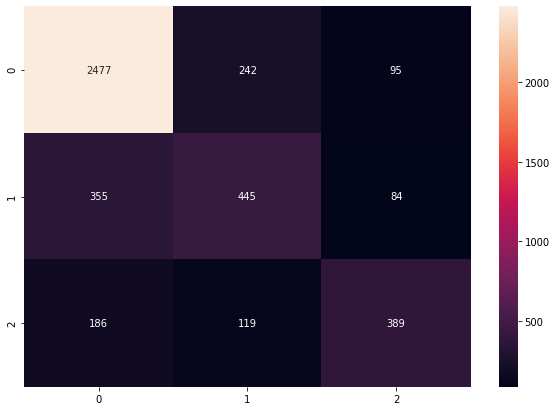

In [41]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(Y_test, Y_predict)

print(CM)

df_CM = pd.DataFrame(CM, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_CM, annot=True, fmt='g')
plt.show()

**Summary:**

1. We used dataset which has reviews in text format and their sentiment as negative,positive and neutral.(score on the scale of 0 to 2, where 0 :negative, 1 :neutral and 2 :signify positive)
2. The goal was to build a model for text-classification.
3. We Pre-processed the data using variuos techniques (Html tag removal, URL removal,Tokenization, Remove the numbers, Removal of Special Characters and Punctuations,Conversion to lowercase, stopword removal,Lemmatize or stemming,Joined the words in the list to convert back to text string in the dataframe)and libraries.
4. In preprocessing techniques, we have first removed the Html tag and Url's, then we replaced the contracted word in a string of words, after that numbers and special characters has been removed. Then we tokenized the word, converted it to lowercase, removed the stopword, performed lemmatization and finally joined the words in the list to convert back to text string.
5. Then pre-precessed data is converted to numbers, so that we can feed the data in the model. 
6. Use 1000 most frequently occuring words to create the bag of words (max_features), Include words that occur in at least 10 documents (min_df),
Use those words that occur in a maximum of 80% of the documents (max_df)
7. We have splitted the data in train and test data in 70:30 ratio respectively.
8. After building the classification model(using random forest classification), we predicted the result for the test data.
9. After that we saw that using the above techniques, our model performed good in perspective of how the text classification models performs( accuracy near about 71 percent for both the count vectorizer and tf-idf vectorizer).
10. However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building.
11. The given dataset is not very huge(approximately 14640 records), there were some duplicates in the data.
12. One more way to increase accuracy is to use different variations of Pre-processing techniques.
13. We can hypertune the model in order to increase the accuracy.
